In [1]:
!pip install --upgrade dwave-ocean-sdk==2.0.1 pandas scipy scikit-learn==0.20.3 matplotlib imgaug==0.2.6

Requirement already up-to-date: pandas in /usr/local/lib/python3.6/dist-packages (1.0.3)
Requirement already up-to-date: scipy in /usr/local/lib/python3.6/dist-packages (1.4.1)
     |████████████████████████████████| 5.4MB 9.9MB/s 
Requirement already up-to-date: matplotlib in /usr/local/lib/python3.6/dist-packages (3.2.1)
     |████████████████████████████████| 634kB 31.5MB/s 
     |████████████████████████████████| 399kB 54.7MB/s 
     |████████████████████████████████| 788kB 50.3MB/s 
     |████████████████████████████████| 92kB 12.7MB/s 
     |████████████████████████████████| 4.6MB 36.4MB/s 
     |████████████████████████████████| 204kB 51.3MB/s 
     |████████████████████████████████| 92kB 9.8MB/s 
     |████████████████████████████████| 92kB 13.0MB/s 
     |████████████████████████████████| 2.3MB 39.9MB/s 
     |████████████████████████████████| 81kB 11.1MB/s 
     |████████████████████████████████| 28.9MB 111kB/s 
     |████████████████████████████████| 1.3MB 51.8MB/s 
  Create

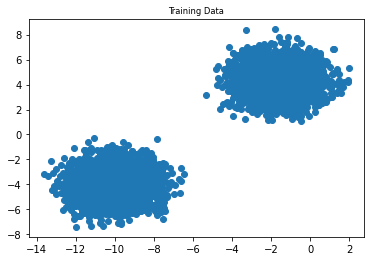

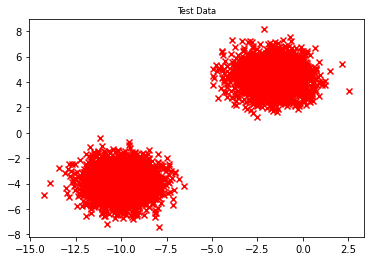

In [1]:
from __future__ import print_function
%matplotlib inline

import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

X1, Y1 = make_blobs(n_samples=15000, n_features=2, centers=2, random_state=1)
Y1 = 2*Y1-1

X_train = X1[0:9999]
y_train = Y1[0:9999]
X_test = X1[10000:14999]
y_test = Y1[10000:14999]

plt.title("Training Data", fontsize='small')
plt.scatter(X_train[:, 0], X_train[:, 1], marker='o')

plt.show()

plt.title("Test Data", fontsize='small')
plt.scatter(X_test[:, 0], X_test[:, 1], marker='x', color='r')
plt.show()

In [2]:
from sklearn import tree
def Decision_Tree(X_train, y_train, X_test, y_test):
    clf1 = tree.DecisionTreeClassifier()
    clf1.fit(X_train, y_train)
    y_train1 = clf1.predict(X_train)
    y_test1 = clf1.predict(X_test)

    from sklearn.metrics import accuracy_score

    print('Accuracy for training data: \t', (accuracy_score(y_train, y_train1)))
    print('Accuracy for test data: \t', (accuracy_score(y_test, y_test1)))
    
    return clf1
    
clf1 = Decision_Tree(X_train, y_train, X_test, y_test)

Accuracy for training data: 	 1.0
Accuracy for test data: 	 1.0


In [3]:
from sklearn.ensemble import RandomForestClassifier
def Random_Forest(X_train, y_train, X_test, y_test):
    clf2 = RandomForestClassifier(max_depth=2, n_estimators=30)
    clf2.fit(X_train, y_train)
    y_train2 = clf2.predict(X_train)
    y_test2 = clf2.predict(X_test)

    from sklearn.metrics import accuracy_score

    print('Accuracy for training data: \t', (accuracy_score(y_train, y_train2)))
    print('Accuracy for test data: \t', (accuracy_score(y_test, y_test2)))
    
    return clf2

clf2 = Random_Forest(X_train, y_train, X_test, y_test)

Accuracy for training data: 	 1.0
Accuracy for test data: 	 1.0


In [4]:
from sklearn.ensemble import AdaBoostClassifier
def AdaBoost(X_train, y_train, X_test, y_test):
    clf3 = AdaBoostClassifier(n_estimators=30)
    clf3.fit(X_train, y_train)
    y_train3 = clf3.predict(X_train)
    y_test3 = clf3.predict(X_test)

    from sklearn.metrics import accuracy_score

    print('Accuracy for training data: \t', (accuracy_score(y_train, y_train3)))
    print('Accuracy for test data: \t', (accuracy_score(y_test, y_test3)))
    
    return clf3
    
clf3 = AdaBoost(X_train, y_train, X_test, y_test)

Accuracy for training data: 	 1.0
Accuracy for test data: 	 1.0


In [5]:
def QBoost(X_train, y_train, X_test, y_test):
    NUM_READS = 1000
    DW_PARAMS = {'num_reads': NUM_READS,
                 'auto_scale': True,
                 'num_spin_reversal_transforms': 10,
                 'postprocess': 'optimization',
                 }

    from dwave.system.samplers import DWaveSampler
    from dwave.system.composites import EmbeddingComposite

    # dwave_sampler = DWaveSampler(solver={'qpu': True}) # Some accounts need to replace this line with the next:
    api_token = 'DEV-97354781ee9c06e1166871b8377d7bbd74468a0d'
    dwave_sampler = DWaveSampler(token=api_token, solver={'qpu':True})
    emb_sampler = EmbeddingComposite(dwave_sampler)

    from qboost import WeakClassifiers, QBoostClassifier

    clf4 = QBoostClassifier(n_estimators=30, max_depth=2)
    clf4.fit(X_train, y_train, emb_sampler, lmd=1.0, **DW_PARAMS)
    y_train4 = clf4.predict(X_train)
    y_test4 = clf4.predict(X_test)

    from sklearn.metrics import accuracy_score

    print('Accuracy for training data: \t', (accuracy_score(y_train, y_train4)))
    print('Accuracy for test data: \t', (accuracy_score(y_test, y_test4)))
    
    return clf4
    
clf4 = QBoost(X_train, y_train, X_test, y_test)

Accuracy for training data: 	 1.0
Accuracy for test data: 	 1.0


In [6]:
def QBoostPlus(X_train, y_train, X_test, y_test, clf1, clf2, clf3, clf4):
    NUM_READS = 1000
    DW_PARAMS = {'num_reads': NUM_READS,
                 'auto_scale': True,
                 'num_spin_reversal_transforms': 10,
                 'postprocess': 'optimization',
                 }

    from dwave.system.samplers import DWaveSampler
    from dwave.system.composites import EmbeddingComposite

    # dwave_sampler = DWaveSampler(solver={'qpu': True}) # Some accounts need to replace this line with the next:
    api_token = 'DEV-97354781ee9c06e1166871b8377d7bbd74468a0d'
    dwave_sampler = DWaveSampler(token=api_token, solver={'qpu':True})
    emb_sampler = EmbeddingComposite(dwave_sampler)
    
    from qboost import QboostPlus

    clf5 = QboostPlus([clf1, clf2, clf3, clf4])
    clf5.fit(X_train, y_train, emb_sampler, lmd=0.2, **DW_PARAMS)
    y_train5 = clf5.predict(X_train)
    y_test5 = clf5.predict(X_test)

    from sklearn.metrics import accuracy_score

    print('Accuracy for training data: \t', (accuracy_score(y_train, y_train5)))
    print('Accuracy for test data: \t', (accuracy_score(y_test, y_test5)))
    
    return clf5
    
clf5 = QBoostPlus(X_train, y_train, X_test, y_test, clf1, clf2, clf3, clf4)

Accuracy for training data: 	 1.0
Accuracy for test data: 	 1.0


## Loading tha manipulation of data

In [7]:
import numpy as np
import pandas as pd
data = np.asanyarray(pd.read_csv('./LabelledTheta.csv', delimiter=',', header=None))

NUM_CHANNELS = 14
ACTUAL_VALUES = 38
CONST_VALUES = 64 - 38
NUM_THETA_VALUES_PER_CHANNEL = ACTUAL_VALUES + CONST_VALUES
NUM_QUBITS = 6

data

array([['Ankur_sir_6', 0.5116529233737879, 2.661255444814941, ..., 0.0,
        0.0, 'Like'],
       ['Sandeep_32', -0.9532752329297408, -4.419225848654918, ..., 0.0,
        0.0, 'Disike'],
       ['mahendra_28', -0.4930886480644289, -1.5454615508228926, ...,
        0.0, 0.0, 'Like'],
       ...,
       ['mahendra_5', -1.9427615337039161, -12.76711513386849, ..., 0.0,
        0.0, 'Like'],
       ['taufiq_10', -0.34627782376502125, -1.75569285697388, ..., 0.0,
        0.0, 'Disike'],
       ['Vijay_32', 0.42956267802355796, 2.191135723676666, ..., 0.0,
        0.0, 'Disike']], dtype=object)

In [0]:
def normalize(X_data):
    for i in range(len(X_data)):
        mu = X_data[i].mean()
        sigma = X_data[i].std()

        X_data[i] = (X_data[i] - mu) / sigma

        for j in range(NUM_CHANNELS):
              for k in range(ACTUAL_VALUES):
                idx = j * ACTUAL_VALUES + k
                if X_data[i][idx] > 2:
                    X_data[i][idx] = 2
                elif X_data[i][idx] < -2:
                    X_data[i][idx] = -2

                if k >= ACTUAL_VALUES:
                    X_data[i][idx] = -2.5

        X_data[i] = ((X_data[i] / 5) + 0.5)
            
    return X_data

In [0]:
def arrange_channelwise(X_data):
    X_data_channelwise = []
    for i in range(NUM_CHANNELS):
        X_i = []
        for j in range(len(X_data)):
            X_j = []
            for k in range(ACTUAL_VALUES):
                idx = i * ACTUAL_VALUES + k
                X_j.append(X_data[j][idx])
                
            X_i.append(np.array(X_j))
            
        X_data_channelwise.append(np.array(X_i))
        
    return X_data_channelwise

In [0]:
X = []
Y = []
for i in range(len(data)):
    X.append(data[i][1:-1])
    Y.append(data[i][-1])
    
X_norm = normalize(X)
X_chwise = arrange_channelwise(X_norm)

In [11]:
print(type(X_chwise), type(X_chwise[0]), type(X_chwise[0][0]))
print(len(X_chwise), len(X_chwise[0]), len(X_chwise[0][0]))

<class 'list'> <class 'numpy.ndarray'> <class 'numpy.ndarray'>
14 1045 38


In [0]:
Y_bin = np.array([1 if y == 'Like' else -1 for y in Y])

In [0]:
train_idxs = int(len(X_norm)*0.7)+1
test_idxs = int(train_idxs + len(X_norm)*0.2)

X_train_eeg = X_norm[:train_idxs]
y_train_eeg = Y_bin[:train_idxs]

X_test_eeg = X_norm[train_idxs:test_idxs]
y_test_eeg = Y_bin[train_idxs:test_idxs]

X_val_eeg = X_norm[test_idxs:]
y_val_eeg = Y_bin[test_idxs:]

In [14]:
X_train_chwise = arrange_channelwise(X_train_eeg)
X_test_chwise = arrange_channelwise(X_test_eeg)
X_val_chwise = arrange_channelwise(X_val_eeg)

print(len(X_train_chwise), len(X_train_chwise[0]), len(X_train_chwise[0][0]))
print(len(X_test_chwise), len(X_test_chwise[0]), len(X_test_chwise[0][0]))
print(len(X_val_chwise), len(X_val_chwise[0]), len(X_val_chwise[0][0]))

14 732 38
14 209 38
14 104 38


# Channel-1

### Training

In [0]:
print('=======================================')
# Decision Tree
print('Decision Tree: ')
clf1_ch1 = Decision_Tree(X_train_chwise[0], y_train_eeg, X_test_chwise[0], y_test_eeg)
print('---------------------------------------')
# Random Forest
print('Random Forest: ')
clf2_ch1 = Random_Forest(X_train_chwise[0], y_train_eeg, X_test_chwise[0], y_test_eeg)
print('---------------------------------------')
# AdaBoost
print('AdaBoost: ')
clf3_ch1 = AdaBoost(X_train_chwise[0], y_train_eeg, X_test_chwise[0], y_test_eeg)
print('---------------------------------------')
# QBoost
print('QBoost: ')
clf4_ch1 = QBoost(X_train_chwise[0], y_train_eeg, X_test_chwise[0], y_test_eeg)
print('---------------------------------------')
# QBoostPlus
print('QBoostPlus: ')
clf5_ch1 = QBoostPlus(X_train_chwise[0], y_train_eeg, X_test_chwise[0], y_test_eeg, clf1_ch1, clf2_ch1, clf3_ch1, clf4_ch1)
print('=======================================')

Decision Tree: 
Accuracy for training data: 	 1.0
Accuracy for test data: 	 0.4880382775119617
---------------------------------------
Random Forest: 
Accuracy for training data: 	 0.575136612021858
Accuracy for test data: 	 0.5550239234449761
---------------------------------------
AdaBoost: 
Accuracy for training data: 	 0.7158469945355191
Accuracy for test data: 	 0.569377990430622
---------------------------------------
QBoost: 
Accuracy for training data: 	 0.6707650273224044
Accuracy for test data: 	 0.583732057416268
---------------------------------------
QBoostPlus: 
Accuracy for training data: 	 0.8469945355191257
Accuracy for test data: 	 0.5789473684210527


### Validation

In [0]:
from sklearn.metrics import accuracy_score
# print('Accuracy for training data: \t', (accuracy_score(y_train, y_train5)))

print('=======================================')
# Decision Tree
print('Decision Tree: ')
y_val1_ch1 = clf1_ch1.predict(X_val_chwise[0])
print('Accuracy for validation data: \t', (accuracy_score(y_val_eeg, y_val1_ch1)))
print('---------------------------------------')
# Random Forest
print('Random Forest: ')
y_val2_ch1 = clf2_ch1.predict(X_val_chwise[0])
print('Accuracy for validation data: \t', (accuracy_score(y_val_eeg, y_val2_ch1)))
print('---------------------------------------')
# AdaBoost
print('AdaBoost: ')
y_val3_ch1 = clf3_ch1.predict(X_val_chwise[0])
print('Accuracy for validation data: \t', (accuracy_score(y_val_eeg, y_val3_ch1)))
print('---------------------------------------')
# QBoost
print('QBoost: ')
y_val4_ch1 = clf4_ch1.predict(X_val_chwise[0])
print('Accuracy for validation data: \t', (accuracy_score(y_val_eeg, y_val4_ch1)))
print('---------------------------------------')
# QBoostPlus
print('QBoostPlus: ')
y_val5_ch1 = clf5_ch1.predict(X_val_chwise[0])
print('Accuracy for validation data: \t', (accuracy_score(y_val_eeg, y_val5_ch1)))

Decision Tree: 
Accuracy for validation data: 	 0.5288461538461539
---------------------------------------
Random Forest: 
Accuracy for validation data: 	 0.5192307692307693
---------------------------------------
AdaBoost: 
Accuracy for validation data: 	 0.5384615384615384
---------------------------------------
QBoost: 
Accuracy for validation data: 	 0.5288461538461539
---------------------------------------
QBoostPlus: 
Accuracy for validation data: 	 0.5865384615384616


# Channel-2

### Training

In [0]:
print('=======================================')
# Decision Tree
print('Decision Tree: ')
clf1_ch2 = Decision_Tree(X_train_chwise[1], y_train_eeg, X_test_chwise[1], y_test_eeg)
print('---------------------------------------')
# Random Forest
print('Random Forest: ')
clf2_ch2 = Random_Forest(X_train_chwise[1], y_train_eeg, X_test_chwise[1], y_test_eeg)
print('---------------------------------------')
# AdaBoost
print('AdaBoost: ')
clf3_ch2 = AdaBoost(X_train_chwise[1], y_train_eeg, X_test_chwise[1], y_test_eeg)
print('---------------------------------------')
# QBoost
print('QBoost: ')
clf4_ch2 = QBoost(X_train_chwise[1], y_train_eeg, X_test_chwise[1], y_test_eeg)
print('---------------------------------------')
# QBoostPlus
print('QBoostPlus: ')
clf5_ch2 = QBoostPlus(X_train_chwise[1], y_train_eeg, X_test_chwise[1], y_test_eeg, clf1_ch2, clf2_ch2, clf3_ch2, clf4_ch2)
print('=======================================')

Decision Tree: 
Accuracy for training data: 	 1.0
Accuracy for test data: 	 0.4880382775119617
---------------------------------------
Random Forest: 
Accuracy for training data: 	 0.5778688524590164
Accuracy for test data: 	 0.5550239234449761
---------------------------------------
AdaBoost: 
Accuracy for training data: 	 0.7008196721311475
Accuracy for test data: 	 0.569377990430622
---------------------------------------
QBoost: 
Accuracy for training data: 	 0.6502732240437158
Accuracy for test data: 	 0.5550239234449761
---------------------------------------
QBoostPlus: 
Accuracy for training data: 	 0.8306010928961749
Accuracy for test data: 	 0.5550239234449761


### Validation

In [0]:
from sklearn.metrics import accuracy_score
# print('Accuracy for training data: \t', (accuracy_score(y_train, y_train5)))

print('=======================================')
# Decision Tree
print('Decision Tree: ')
y_val1_ch2 = clf1_ch2.predict(X_val_chwise[1])
print('Accuracy for validation data: \t', (accuracy_score(y_val_eeg, y_val1_ch2)))
print('---------------------------------------')
# Random Forest
print('Random Forest: ')
y_val2_ch2 = clf2_ch2.predict(X_val_chwise[1])
print('Accuracy for validation data: \t', (accuracy_score(y_val_eeg, y_val2_ch2)))
print('---------------------------------------')
# AdaBoost
print('AdaBoost: ')
y_val3_ch2 = clf3_ch2.predict(X_val_chwise[1])
print('Accuracy for validation data: \t', (accuracy_score(y_val_eeg, y_val3_ch2)))
print('---------------------------------------')
# QBoost
print('QBoost: ')
y_val4_ch2 = clf4_ch2.predict(X_val_chwise[1])
print('Accuracy for validation data: \t', (accuracy_score(y_val_eeg, y_val4_ch2)))
print('---------------------------------------')
# QBoostPlus
print('QBoostPlus: ')
y_val5_ch2 = clf5_ch2.predict(X_val_chwise[1])
print('Accuracy for validation data: \t', (accuracy_score(y_val_eeg, y_val5_ch2)))

Decision Tree: 
Accuracy for validation data: 	 0.5673076923076923
---------------------------------------
Random Forest: 
Accuracy for validation data: 	 0.5384615384615384
---------------------------------------
AdaBoost: 
Accuracy for validation data: 	 0.5769230769230769
---------------------------------------
QBoost: 
Accuracy for validation data: 	 0.5096153846153846
---------------------------------------
QBoostPlus: 
Accuracy for validation data: 	 0.5288461538461539


# Channel-3

### Training

In [0]:
print('=======================================')
# Decision Tree
print('Decision Tree: ')
clf1_ch3 = Decision_Tree(X_train_chwise[2], y_train_eeg, X_test_chwise[2], y_test_eeg)
print('---------------------------------------')
# Random Forest
print('Random Forest: ')
clf2_ch3 = Random_Forest(X_train_chwise[2], y_train_eeg, X_test_chwise[2], y_test_eeg)
print('---------------------------------------')
# AdaBoost
print('AdaBoost: ')
clf3_ch3 = AdaBoost(X_train_chwise[2], y_train_eeg, X_test_chwise[2], y_test_eeg)
print('---------------------------------------')
# QBoost
print('QBoost: ')
clf4_ch3 = QBoost(X_train_chwise[2], y_train_eeg, X_test_chwise[2], y_test_eeg)
print('---------------------------------------')
# QBoostPlus
print('QBoostPlus: ')
clf5_ch3 = QBoostPlus(X_train_chwise[2], y_train_eeg, X_test_chwise[2], y_test_eeg, clf1_ch3, clf2_ch3, clf3_ch3, clf4_ch3)
print('=======================================')

Decision Tree: 
Accuracy for training data: 	 1.0
Accuracy for test data: 	 0.45933014354066987
---------------------------------------
Random Forest: 
Accuracy for training data: 	 0.5683060109289617
Accuracy for test data: 	 0.5550239234449761
---------------------------------------
AdaBoost: 
Accuracy for training data: 	 0.7185792349726776
Accuracy for test data: 	 0.5358851674641149
---------------------------------------
QBoost: 
Accuracy for training data: 	 0.7527322404371585
Accuracy for test data: 	 0.5502392344497608
---------------------------------------
QBoostPlus: 
Accuracy for training data: 	 0.8661202185792349
Accuracy for test data: 	 0.4880382775119617


### Validation

In [0]:
from sklearn.metrics import accuracy_score
# print('Accuracy for training data: \t', (accuracy_score(y_train, y_train5)))

print('=======================================')
# Decision Tree
print('Decision Tree: ')
y_val1_ch3 = clf1_ch3.predict(X_val_chwise[2])
print('Accuracy for validation data: \t', (accuracy_score(y_val_eeg, y_val1_ch3)))
print('---------------------------------------')
# Random Forest
print('Random Forest: ')
y_val2_ch3 = clf2_ch3.predict(X_val_chwise[2])
print('Accuracy for validation data: \t', (accuracy_score(y_val_eeg, y_val2_ch3)))
print('---------------------------------------')
# AdaBoost
print('AdaBoost: ')
y_val3_ch3 = clf3_ch3.predict(X_val_chwise[2])
print('Accuracy for validation data: \t', (accuracy_score(y_val_eeg, y_val3_ch3)))
print('---------------------------------------')
# QBoost
print('QBoost: ')
y_val4_ch3 = clf4_ch3.predict(X_val_chwise[2])
print('Accuracy for validation data: \t', (accuracy_score(y_val_eeg, y_val4_ch3)))
print('---------------------------------------')
# QBoostPlus
print('QBoostPlus: ')
y_val5_ch3 = clf5_ch3.predict(X_val_chwise[2])
print('Accuracy for validation data: \t', (accuracy_score(y_val_eeg, y_val5_ch3)))

Decision Tree: 
Accuracy for validation data: 	 0.4230769230769231
---------------------------------------
Random Forest: 
Accuracy for validation data: 	 0.5288461538461539
---------------------------------------
AdaBoost: 
Accuracy for validation data: 	 0.49038461538461536
---------------------------------------
QBoost: 
Accuracy for validation data: 	 0.5384615384615384
---------------------------------------
QBoostPlus: 
Accuracy for validation data: 	 0.47115384615384615


# Channel-4

### Training

In [0]:
print('=======================================')
# Decision Tree
print('Decision Tree: ')
clf1_ch4 = Decision_Tree(X_train_chwise[3], y_train_eeg, X_test_chwise[3], y_test_eeg)
print('---------------------------------------')
# Random Forest
print('Random Forest: ')
clf2_ch4 = Random_Forest(X_train_chwise[3], y_train_eeg, X_test_chwise[3], y_test_eeg)
print('---------------------------------------')
# AdaBoost
print('AdaBoost: ')
clf3_ch4 = AdaBoost(X_train_chwise[3], y_train_eeg, X_test_chwise[3], y_test_eeg)
print('---------------------------------------')
# QBoost
print('QBoost: ')
clf4_ch4 = QBoost(X_train_chwise[3], y_train_eeg, X_test_chwise[3], y_test_eeg)
print('---------------------------------------')
# QBoostPlus
print('QBoostPlus: ')
clf5_ch4 = QBoostPlus(X_train_chwise[3], y_train_eeg, X_test_chwise[3], y_test_eeg, clf1_ch4, clf2_ch4, clf3_ch4, clf4_ch4)
print('=======================================')

Decision Tree: 
Accuracy for training data: 	 1.0
Accuracy for test data: 	 0.5550239234449761
---------------------------------------
Random Forest: 
Accuracy for training data: 	 0.5778688524590164
Accuracy for test data: 	 0.5645933014354066
---------------------------------------
AdaBoost: 
Accuracy for training data: 	 0.6830601092896175
Accuracy for test data: 	 0.5598086124401914
---------------------------------------
QBoost: 
Accuracy for training data: 	 0.6584699453551912
Accuracy for test data: 	 0.5741626794258373
---------------------------------------
QBoostPlus: 
Accuracy for training data: 	 0.8278688524590164
Accuracy for test data: 	 0.5933014354066986


### Validation

In [0]:
from sklearn.metrics import accuracy_score
# print('Accuracy for training data: \t', (accuracy_score(y_train, y_train5)))

print('=======================================')
# Decision Tree
print('Decision Tree: ')
y_val1_ch4 = clf1_ch4.predict(X_val_chwise[3])
print('Accuracy for validation data: \t', (accuracy_score(y_val_eeg, y_val1_ch4)))
print('---------------------------------------')
# Random Forest
print('Random Forest: ')
y_val2_ch4 = clf2_ch4.predict(X_val_chwise[3])
print('Accuracy for validation data: \t', (accuracy_score(y_val_eeg, y_val2_ch4)))
print('---------------------------------------')
# AdaBoost
print('AdaBoost: ')
y_val3_ch4 = clf3_ch4.predict(X_val_chwise[3])
print('Accuracy for validation data: \t', (accuracy_score(y_val_eeg, y_val3_ch4)))
print('---------------------------------------')
# QBoost
print('QBoost: ')
y_val4_ch4 = clf4_ch4.predict(X_val_chwise[3])
print('Accuracy for validation data: \t', (accuracy_score(y_val_eeg, y_val4_ch4)))
print('---------------------------------------')
# QBoostPlus
print('QBoostPlus: ')
y_val5_ch4 = clf5_ch4.predict(X_val_chwise[3])
print('Accuracy for validation data: \t', (accuracy_score(y_val_eeg, y_val5_ch4)))

Decision Tree: 
Accuracy for validation data: 	 0.5576923076923077
---------------------------------------
Random Forest: 
Accuracy for validation data: 	 0.5096153846153846
---------------------------------------
AdaBoost: 
Accuracy for validation data: 	 0.5384615384615384
---------------------------------------
QBoost: 
Accuracy for validation data: 	 0.5288461538461539
---------------------------------------
QBoostPlus: 
Accuracy for validation data: 	 0.5384615384615384


# Channel-5

### Training

In [0]:
print('=======================================')
# Decision Tree
print('Decision Tree: ')
clf1_ch5 = Decision_Tree(X_train_chwise[4], y_train_eeg, X_test_chwise[4], y_test_eeg)
print('---------------------------------------')
# Random Forest
print('Random Forest: ')
clf2_ch5 = Random_Forest(X_train_chwise[4], y_train_eeg, X_test_chwise[4], y_test_eeg)
print('---------------------------------------')
# AdaBoost
print('AdaBoost: ')
clf3_ch5 = AdaBoost(X_train_chwise[4], y_train_eeg, X_test_chwise[4], y_test_eeg)
print('---------------------------------------')
# QBoost
print('QBoost: ')
clf4_ch5 = QBoost(X_train_chwise[4], y_train_eeg, X_test_chwise[4], y_test_eeg)
print('---------------------------------------')
# QBoostPlus
print('QBoostPlus: ')
clf5_ch5 = QBoostPlus(X_train_chwise[4], y_train_eeg, X_test_chwise[4], y_test_eeg, clf1_ch5, clf2_ch5, clf3_ch5, clf4_ch5)
print('=======================================')

Decision Tree: 
Accuracy for training data: 	 1.0
Accuracy for test data: 	 0.5215311004784688
---------------------------------------
Random Forest: 
Accuracy for training data: 	 0.5737704918032787
Accuracy for test data: 	 0.5454545454545454
---------------------------------------
AdaBoost: 
Accuracy for training data: 	 0.7090163934426229
Accuracy for test data: 	 0.5215311004784688
---------------------------------------
QBoost: 
Accuracy for training data: 	 0.6243169398907104
Accuracy for test data: 	 0.5502392344497608
---------------------------------------
QBoostPlus: 
Accuracy for training data: 	 0.8292349726775956
Accuracy for test data: 	 0.5502392344497608


### Validation

In [0]:
from sklearn.metrics import accuracy_score
# print('Accuracy for training data: \t', (accuracy_score(y_train, y_train5)))

print('=======================================')
# Decision Tree
print('Decision Tree: ')
y_val1_ch5 = clf1_ch5.predict(X_val_chwise[4])
print('Accuracy for validation data: \t', (accuracy_score(y_val_eeg, y_val1_ch5)))
print('---------------------------------------')
# Random Forest
print('Random Forest: ')
y_val2_ch5 = clf2_ch5.predict(X_val_chwise[4])
print('Accuracy for validation data: \t', (accuracy_score(y_val_eeg, y_val2_ch5)))
print('---------------------------------------')
# AdaBoost
print('AdaBoost: ')
y_val3_ch5 = clf3_ch5.predict(X_val_chwise[4])
print('Accuracy for validation data: \t', (accuracy_score(y_val_eeg, y_val3_ch5)))
print('---------------------------------------')
# QBoost
print('QBoost: ')
y_val4_ch5 = clf4_ch5.predict(X_val_chwise[4])
print('Accuracy for validation data: \t', (accuracy_score(y_val_eeg, y_val4_ch5)))
print('---------------------------------------')
# QBoostPlus
print('QBoostPlus: ')
y_val5_ch5 = clf5_ch5.predict(X_val_chwise[4])
print('Accuracy for validation data: \t', (accuracy_score(y_val_eeg, y_val5_ch5)))

Decision Tree: 
Accuracy for validation data: 	 0.5961538461538461
---------------------------------------
Random Forest: 
Accuracy for validation data: 	 0.5192307692307693
---------------------------------------
AdaBoost: 
Accuracy for validation data: 	 0.5288461538461539
---------------------------------------
QBoost: 
Accuracy for validation data: 	 0.5576923076923077
---------------------------------------
QBoostPlus: 
Accuracy for validation data: 	 0.6153846153846154


# Channel-6

### Training

In [0]:
print('=======================================')
# Decision Tree
print('Decision Tree: ')
clf1_ch6 = Decision_Tree(X_train_chwise[5], y_train_eeg, X_test_chwise[5], y_test_eeg)
print('---------------------------------------')
# Random Forest
print('Random Forest: ')
clf2_ch6 = Random_Forest(X_train_chwise[5], y_train_eeg, X_test_chwise[5], y_test_eeg)
print('---------------------------------------')
# AdaBoost
print('AdaBoost: ')
clf3_ch6 = AdaBoost(X_train_chwise[5], y_train_eeg, X_test_chwise[5], y_test_eeg)
print('---------------------------------------')
# QBoost
print('QBoost: ')
clf4_ch6 = QBoost(X_train_chwise[5], y_train_eeg, X_test_chwise[5], y_test_eeg)
print('---------------------------------------')
# QBoostPlus
print('QBoostPlus: ')
clf5_ch6 = QBoostPlus(X_train_chwise[5], y_train_eeg, X_test_chwise[5], y_test_eeg, clf1_ch6, clf2_ch6, clf3_ch6, clf4_ch6)
print('=======================================')

Decision Tree: 
Accuracy for training data: 	 1.0
Accuracy for test data: 	 0.45454545454545453
---------------------------------------
Random Forest: 
Accuracy for training data: 	 0.5765027322404371
Accuracy for test data: 	 0.5550239234449761
---------------------------------------
AdaBoost: 
Accuracy for training data: 	 0.7090163934426229
Accuracy for test data: 	 0.5263157894736842
---------------------------------------
QBoost: 
Accuracy for training data: 	 0.6147540983606558
Accuracy for test data: 	 0.5502392344497608
---------------------------------------
QBoostPlus: 
Accuracy for training data: 	 0.8346994535519126
Accuracy for test data: 	 0.5311004784688995


### Validation

In [0]:
from sklearn.metrics import accuracy_score
# print('Accuracy for training data: \t', (accuracy_score(y_train, y_train5)))

print('=======================================')
# Decision Tree
print('Decision Tree: ')
y_val1_ch6 = clf1_ch6.predict(X_val_chwise[5])
print('Accuracy for validation data: \t', (accuracy_score(y_val_eeg, y_val1_ch6)))
print('---------------------------------------')
# Random Forest
print('Random Forest: ')
y_val2_ch6 = clf2_ch6.predict(X_val_chwise[5])
print('Accuracy for validation data: \t', (accuracy_score(y_val_eeg, y_val2_ch6)))
print('---------------------------------------')
# AdaBoost
print('AdaBoost: ')
y_val3_ch6 = clf3_ch6.predict(X_val_chwise[5])
print('Accuracy for validation data: \t', (accuracy_score(y_val_eeg, y_val3_ch6)))
print('---------------------------------------')
# QBoost
print('QBoost: ')
y_val4_ch6 = clf4_ch6.predict(X_val_chwise[5])
print('Accuracy for validation data: \t', (accuracy_score(y_val_eeg, y_val4_ch6)))
print('---------------------------------------')
# QBoostPlus
print('QBoostPlus: ')
y_val5_ch6 = clf5_ch6.predict(X_val_chwise[5])
print('Accuracy for validation data: \t', (accuracy_score(y_val_eeg, y_val5_ch6)))

Decision Tree: 
Accuracy for validation data: 	 0.4519230769230769
---------------------------------------
Random Forest: 
Accuracy for validation data: 	 0.5288461538461539
---------------------------------------
AdaBoost: 
Accuracy for validation data: 	 0.5
---------------------------------------
QBoost: 
Accuracy for validation data: 	 0.5384615384615384
---------------------------------------
QBoostPlus: 
Accuracy for validation data: 	 0.4519230769230769


# Channel-7

### Training

In [0]:
print('=======================================')
# Decision Tree
print('Decision Tree: ')
clf1_ch7 = Decision_Tree(X_train_chwise[6], y_train_eeg, X_test_chwise[6], y_test_eeg)
print('---------------------------------------')
# Random Forest
print('Random Forest: ')
clf2_ch7 = Random_Forest(X_train_chwise[6], y_train_eeg, X_test_chwise[6], y_test_eeg)
print('---------------------------------------')
# AdaBoost
print('AdaBoost: ')
clf3_ch7 = AdaBoost(X_train_chwise[6], y_train_eeg, X_test_chwise[6], y_test_eeg)
print('---------------------------------------')
# QBoost
print('QBoost: ')
clf4_ch7 = QBoost(X_train_chwise[6], y_train_eeg, X_test_chwise[6], y_test_eeg)
print('---------------------------------------')
# QBoostPlus
print('QBoostPlus: ')
clf5_ch7 = QBoostPlus(X_train_chwise[6], y_train_eeg, X_test_chwise[6], y_test_eeg, clf1_ch7, clf2_ch7, clf3_ch7, clf4_ch7)
print('=======================================')

Decision Tree: 
Accuracy for training data: 	 1.0
Accuracy for test data: 	 0.5311004784688995
---------------------------------------
Random Forest: 
Accuracy for training data: 	 0.5860655737704918
Accuracy for test data: 	 0.5550239234449761
---------------------------------------
AdaBoost: 
Accuracy for training data: 	 0.6994535519125683
Accuracy for test data: 	 0.4880382775119617
---------------------------------------
QBoost: 
Accuracy for training data: 	 0.6980874316939891
Accuracy for test data: 	 0.5167464114832536
---------------------------------------
QBoostPlus: 
Accuracy for training data: 	 0.837431693989071
Accuracy for test data: 	 0.5119617224880383


### Validation

In [0]:
from sklearn.metrics import accuracy_score
# print('Accuracy for training data: \t', (accuracy_score(y_train, y_train5)))

print('=======================================')
# Decision Tree
print('Decision Tree: ')
y_val1_ch7 = clf1_ch7.predict(X_val_chwise[6])
print('Accuracy for validation data: \t', (accuracy_score(y_val_eeg, y_val1_ch7)))
print('---------------------------------------')
# Random Forest
print('Random Forest: ')
y_val2_ch7 = clf2_ch7.predict(X_val_chwise[6])
print('Accuracy for validation data: \t', (accuracy_score(y_val_eeg, y_val2_ch7)))
print('---------------------------------------')
# AdaBoost
print('AdaBoost: ')
y_val3_ch7 = clf3_ch7.predict(X_val_chwise[6])
print('Accuracy for validation data: \t', (accuracy_score(y_val_eeg, y_val3_ch7)))
print('---------------------------------------')
# QBoost
print('QBoost: ')
y_val4_ch7 = clf4_ch7.predict(X_val_chwise[6])
print('Accuracy for validation data: \t', (accuracy_score(y_val_eeg, y_val4_ch7)))
print('---------------------------------------')
# QBoostPlus
print('QBoostPlus: ')
y_val5_ch7 = clf5_ch7.predict(X_val_chwise[6])
print('Accuracy for validation data: \t', (accuracy_score(y_val_eeg, y_val5_ch7)))

Decision Tree: 
Accuracy for validation data: 	 0.5192307692307693
---------------------------------------
Random Forest: 
Accuracy for validation data: 	 0.5384615384615384
---------------------------------------
AdaBoost: 
Accuracy for validation data: 	 0.5769230769230769
---------------------------------------
QBoost: 
Accuracy for validation data: 	 0.5769230769230769
---------------------------------------
QBoostPlus: 
Accuracy for validation data: 	 0.5961538461538461


# Channel-8

### Training

In [0]:
print('=======================================')
# Decision Tree
print('Decision Tree: ')
clf1_ch8 = Decision_Tree(X_train_chwise[7], y_train_eeg, X_test_chwise[7], y_test_eeg)
print('---------------------------------------')
# Random Forest
print('Random Forest: ')
clf2_ch8 = Random_Forest(X_train_chwise[7], y_train_eeg, X_test_chwise[7], y_test_eeg)
print('---------------------------------------')
# AdaBoost
print('AdaBoost: ')
clf3_ch8 = AdaBoost(X_train_chwise[7], y_train_eeg, X_test_chwise[7], y_test_eeg)
print('---------------------------------------')
# QBoost
print('QBoost: ')
clf4_ch8 = QBoost(X_train_chwise[7], y_train_eeg, X_test_chwise[7], y_test_eeg)
print('---------------------------------------')
# QBoostPlus
print('QBoostPlus: ')
clf5_ch8 = QBoostPlus(X_train_chwise[7], y_train_eeg, X_test_chwise[7], y_test_eeg, clf1_ch8, clf2_ch8, clf3_ch8, clf4_ch8)
print('=======================================')

Decision Tree: 
Accuracy for training data: 	 1.0
Accuracy for test data: 	 0.49760765550239233
---------------------------------------
Random Forest: 
Accuracy for training data: 	 0.6188524590163934
Accuracy for test data: 	 0.5550239234449761
---------------------------------------
AdaBoost: 
Accuracy for training data: 	 0.7021857923497268
Accuracy for test data: 	 0.5502392344497608
---------------------------------------
QBoost: 
Accuracy for training data: 	 0.6202185792349727
Accuracy for test data: 	 0.5645933014354066
---------------------------------------
QBoostPlus: 
Accuracy for training data: 	 0.842896174863388
Accuracy for test data: 	 0.5741626794258373


### Validation

In [0]:
from sklearn.metrics import accuracy_score
# print('Accuracy for training data: \t', (accuracy_score(y_train, y_train5)))

print('=======================================')
# Decision Tree
print('Decision Tree: ')
y_val1_ch8 = clf1_ch8.predict(X_val_chwise[7])
print('Accuracy for validation data: \t', (accuracy_score(y_val_eeg, y_val1_ch8)))
print('---------------------------------------')
# Random Forest
print('Random Forest: ')
y_val2_ch8 = clf2_ch8.predict(X_val_chwise[7])
print('Accuracy for validation data: \t', (accuracy_score(y_val_eeg, y_val2_ch8)))
print('---------------------------------------')
# AdaBoost
print('AdaBoost: ')
y_val3_ch8 = clf3_ch8.predict(X_val_chwise[7])
print('Accuracy for validation data: \t', (accuracy_score(y_val_eeg, y_val3_ch8)))
print('---------------------------------------')
# QBoost
print('QBoost: ')
y_val4_ch8 = clf4_ch8.predict(X_val_chwise[7])
print('Accuracy for validation data: \t', (accuracy_score(y_val_eeg, y_val4_ch8)))
print('---------------------------------------')
# QBoostPlus
print('QBoostPlus: ')
y_val5_ch8 = clf5_ch8.predict(X_val_chwise[7])
print('Accuracy for validation data: \t', (accuracy_score(y_val_eeg, y_val5_ch8)))

Decision Tree: 
Accuracy for validation data: 	 0.4807692307692308
---------------------------------------
Random Forest: 
Accuracy for validation data: 	 0.5673076923076923
---------------------------------------
AdaBoost: 
Accuracy for validation data: 	 0.5096153846153846
---------------------------------------
QBoost: 
Accuracy for validation data: 	 0.5192307692307693
---------------------------------------
QBoostPlus: 
Accuracy for validation data: 	 0.5


# Channel-9

### Training

In [0]:
print('=======================================')
# Decision Tree
print('Decision Tree: ')
clf1_ch9 = Decision_Tree(X_train_chwise[8], y_train_eeg, X_test_chwise[8], y_test_eeg)
print('---------------------------------------')
# Random Forest
print('Random Forest: ')
clf2_ch9 = Random_Forest(X_train_chwise[8], y_train_eeg, X_test_chwise[8], y_test_eeg)
print('---------------------------------------')
# AdaBoost
print('AdaBoost: ')
clf3_ch9 = AdaBoost(X_train_chwise[8], y_train_eeg, X_test_chwise[8], y_test_eeg)
print('---------------------------------------')
# QBoost
print('QBoost: ')
clf4_ch9 = QBoost(X_train_chwise[8], y_train_eeg, X_test_chwise[8], y_test_eeg)
print('---------------------------------------')
# QBoostPlus
print('QBoostPlus: ')
clf5_ch9 = QBoostPlus(X_train_chwise[8], y_train_eeg, X_test_chwise[8], y_test_eeg, clf1_ch9, clf2_ch9, clf3_ch9, clf4_ch9)
print('=======================================')

Decision Tree: 
Accuracy for training data: 	 1.0
Accuracy for test data: 	 0.5023923444976076
---------------------------------------
Random Forest: 
Accuracy for training data: 	 0.5969945355191257
Accuracy for test data: 	 0.5454545454545454
---------------------------------------
AdaBoost: 
Accuracy for training data: 	 0.7131147540983607
Accuracy for test data: 	 0.5502392344497608
---------------------------------------
QBoost: 
Accuracy for training data: 	 0.6844262295081968
Accuracy for test data: 	 0.5550239234449761
---------------------------------------
QBoostPlus: 
Accuracy for training data: 	 0.8401639344262295
Accuracy for test data: 	 0.5645933014354066


### Validation

In [0]:
from sklearn.metrics import accuracy_score
# print('Accuracy for training data: \t', (accuracy_score(y_train, y_train5)))

print('=======================================')
# Decision Tree
print('Decision Tree: ')
y_val1_ch9 = clf1_ch9.predict(X_val_chwise[8])
print('Accuracy for validation data: \t', (accuracy_score(y_val_eeg, y_val1_ch9)))
print('---------------------------------------')
# Random Forest
print('Random Forest: ')
y_val2_ch9 = clf2_ch9.predict(X_val_chwise[8])
print('Accuracy for validation data: \t', (accuracy_score(y_val_eeg, y_val2_ch9)))
print('---------------------------------------')
# AdaBoost
print('AdaBoost: ')
y_val3_ch9 = clf3_ch9.predict(X_val_chwise[8])
print('Accuracy for validation data: \t', (accuracy_score(y_val_eeg, y_val3_ch9)))
print('---------------------------------------')
# QBoost
print('QBoost: ')
y_val4_ch9 = clf4_ch9.predict(X_val_chwise[8])
print('Accuracy for validation data: \t', (accuracy_score(y_val_eeg, y_val4_ch9)))
print('---------------------------------------')
# QBoostPlus
print('QBoostPlus: ')
y_val5_ch9 = clf5_ch9.predict(X_val_chwise[8])
print('Accuracy for validation data: \t', (accuracy_score(y_val_eeg, y_val5_ch9)))

Decision Tree: 
Accuracy for validation data: 	 0.375
---------------------------------------
Random Forest: 
Accuracy for validation data: 	 0.5384615384615384
---------------------------------------
AdaBoost: 
Accuracy for validation data: 	 0.5288461538461539
---------------------------------------
QBoost: 
Accuracy for validation data: 	 0.5288461538461539
---------------------------------------
QBoostPlus: 
Accuracy for validation data: 	 0.5384615384615384


# Channel-10

### Training

In [0]:
print('=======================================')
# Decision Tree
print('Decision Tree: ')
clf1_ch10 = Decision_Tree(X_train_chwise[9], y_train_eeg, X_test_chwise[9], y_test_eeg)
print('---------------------------------------')
# Random Forest
print('Random Forest: ')
clf2_ch10 = Random_Forest(X_train_chwise[9], y_train_eeg, X_test_chwise[9], y_test_eeg)
print('---------------------------------------')
# AdaBoost
print('AdaBoost: ')
clf3_ch10 = AdaBoost(X_train_chwise[9], y_train_eeg, X_test_chwise[9], y_test_eeg)
print('---------------------------------------')
# QBoost
print('QBoost: ')
clf4_ch10 = QBoost(X_train_chwise[9], y_train_eeg, X_test_chwise[9], y_test_eeg)
print('---------------------------------------')
# QBoostPlus
print('QBoostPlus: ')
clf5_ch10 = QBoostPlus(X_train_chwise[9], y_train_eeg, X_test_chwise[9], y_test_eeg, clf1_ch10, clf2_ch10, clf3_ch10, clf4_ch10)
print('=======================================')

Decision Tree: 
Accuracy for training data: 	 1.0
Accuracy for test data: 	 0.5358851674641149
---------------------------------------
Random Forest: 
Accuracy for training data: 	 0.5901639344262295
Accuracy for test data: 	 0.5550239234449761
---------------------------------------
AdaBoost: 
Accuracy for training data: 	 0.7076502732240437
Accuracy for test data: 	 0.507177033492823
---------------------------------------
QBoost: 
Accuracy for training data: 	 0.6024590163934426
Accuracy for test data: 	 0.5550239234449761
---------------------------------------
QBoostPlus: 
Accuracy for training data: 	 0.8292349726775956
Accuracy for test data: 	 0.5789473684210527


### Validation

In [0]:
from sklearn.metrics import accuracy_score
# print('Accuracy for training data: \t', (accuracy_score(y_train, y_train5)))

print('=======================================')
# Decision Tree
print('Decision Tree: ')
y_val1_ch10 = clf1_ch10.predict(X_val_chwise[9])
print('Accuracy for validation data: \t', (accuracy_score(y_val_eeg, y_val1_ch10)))
print('---------------------------------------')
# Random Forest
print('Random Forest: ')
y_val2_ch10 = clf2_ch10.predict(X_val_chwise[9])
print('Accuracy for validation data: \t', (accuracy_score(y_val_eeg, y_val2_ch10)))
print('---------------------------------------')
# AdaBoost
print('AdaBoost: ')
y_val3_ch10 = clf3_ch10.predict(X_val_chwise[9])
print('Accuracy for validation data: \t', (accuracy_score(y_val_eeg, y_val3_ch10)))
print('---------------------------------------')
# QBoost
print('QBoost: ')
y_val4_ch10 = clf4_ch10.predict(X_val_chwise[9])
print('Accuracy for validation data: \t', (accuracy_score(y_val_eeg, y_val4_ch10)))
print('---------------------------------------')
# QBoostPlus
print('QBoostPlus: ')
y_val5_ch10 = clf5_ch10.predict(X_val_chwise[9])
print('Accuracy for validation data: \t', (accuracy_score(y_val_eeg, y_val5_ch10)))

Decision Tree: 
Accuracy for validation data: 	 0.5
---------------------------------------
Random Forest: 
Accuracy for validation data: 	 0.4807692307692308
---------------------------------------
AdaBoost: 
Accuracy for validation data: 	 0.5192307692307693
---------------------------------------
QBoost: 
Accuracy for validation data: 	 0.5288461538461539
---------------------------------------
QBoostPlus: 
Accuracy for validation data: 	 0.5288461538461539


# Channel-11

### Training

In [0]:
print('=======================================')
# Decision Tree
print('Decision Tree: ')
clf1_ch11 = Decision_Tree(X_train_chwise[10], y_train_eeg, X_test_chwise[10], y_test_eeg)
print('---------------------------------------')
# Random Forest
print('Random Forest: ')
clf2_ch11 = Random_Forest(X_train_chwise[10], y_train_eeg, X_test_chwise[10], y_test_eeg)
print('---------------------------------------')
# AdaBoost
print('AdaBoost: ')
clf3_ch11 = AdaBoost(X_train_chwise[10], y_train_eeg, X_test_chwise[10], y_test_eeg)
print('---------------------------------------')
# QBoost
print('QBoost: ')
clf4_ch11 = QBoost(X_train_chwise[10], y_train_eeg, X_test_chwise[10], y_test_eeg)
print('---------------------------------------')
# QBoostPlus
print('QBoostPlus: ')
clf5_ch11 = QBoostPlus(X_train_chwise[10], y_train_eeg, X_test_chwise[10], y_test_eeg, clf1_ch11, clf2_ch11, clf3_ch11, clf4_ch11)
print('=======================================')

Decision Tree: 
Accuracy for training data: 	 1.0
Accuracy for test data: 	 0.507177033492823
---------------------------------------
Random Forest: 
Accuracy for training data: 	 0.569672131147541
Accuracy for test data: 	 0.5550239234449761
---------------------------------------
AdaBoost: 
Accuracy for training data: 	 0.7172131147540983
Accuracy for test data: 	 0.5406698564593302
---------------------------------------
QBoost: 
Accuracy for training data: 	 0.6830601092896175
Accuracy for test data: 	 0.5406698564593302
---------------------------------------
QBoostPlus: 
Accuracy for training data: 	 0.8579234972677595
Accuracy for test data: 	 0.5502392344497608


### Validation

In [0]:
from sklearn.metrics import accuracy_score
# print('Accuracy for training data: \t', (accuracy_score(y_train, y_train5)))

print('=======================================')
# Decision Tree
print('Decision Tree: ')
y_val1_ch11 = clf1_ch11.predict(X_val_chwise[10])
print('Accuracy for validation data: \t', (accuracy_score(y_val_eeg, y_val1_ch11)))
print('---------------------------------------')
# Random Forest
print('Random Forest: ')
y_val2_ch11 = clf2_ch11.predict(X_val_chwise[10])
print('Accuracy for validation data: \t', (accuracy_score(y_val_eeg, y_val2_ch11)))
print('---------------------------------------')
# AdaBoost
print('AdaBoost: ')
y_val3_ch11 = clf3_ch11.predict(X_val_chwise[10])
print('Accuracy for validation data: \t', (accuracy_score(y_val_eeg, y_val3_ch11)))
print('---------------------------------------')
# QBoost
print('QBoost: ')
y_val4_ch11 = clf4_ch11.predict(X_val_chwise[10])
print('Accuracy for validation data: \t', (accuracy_score(y_val_eeg, y_val4_ch11)))
print('---------------------------------------')
# QBoostPlus
print('QBoostPlus: ')
y_val5_ch11 = clf5_ch11.predict(X_val_chwise[10])
print('Accuracy for validation data: \t', (accuracy_score(y_val_eeg, y_val5_ch11)))

Decision Tree: 
Accuracy for validation data: 	 0.49038461538461536
---------------------------------------
Random Forest: 
Accuracy for validation data: 	 0.5384615384615384
---------------------------------------
AdaBoost: 
Accuracy for validation data: 	 0.5096153846153846
---------------------------------------
QBoost: 
Accuracy for validation data: 	 0.5384615384615384
---------------------------------------
QBoostPlus: 
Accuracy for validation data: 	 0.46153846153846156


# Channel-12

### Training

In [0]:
print('=======================================')
# Decision Tree
print('Decision Tree: ')
clf1_ch12 = Decision_Tree(X_train_chwise[11], y_train_eeg, X_test_chwise[11], y_test_eeg)
print('---------------------------------------')
# Random Forest
print('Random Forest: ')
clf2_ch12 = Random_Forest(X_train_chwise[11], y_train_eeg, X_test_chwise[11], y_test_eeg)
print('---------------------------------------')
# AdaBoost
print('AdaBoost: ')
clf3_ch12 = AdaBoost(X_train_chwise[11], y_train_eeg, X_test_chwise[11], y_test_eeg)
print('---------------------------------------')
# QBoost
print('QBoost: ')
clf4_ch12 = QBoost(X_train_chwise[11], y_train_eeg, X_test_chwise[11], y_test_eeg)
print('---------------------------------------')
# QBoostPlus
print('QBoostPlus: ')
clf5_ch12 = QBoostPlus(X_train_chwise[11], y_train_eeg, X_test_chwise[11], y_test_eeg, clf1_ch12, clf2_ch12, clf3_ch12, clf4_ch12)
print('=======================================')

Decision Tree: 
Accuracy for training data: 	 1.0
Accuracy for test data: 	 0.5167464114832536
---------------------------------------
Random Forest: 
Accuracy for training data: 	 0.5765027322404371
Accuracy for test data: 	 0.5550239234449761
---------------------------------------
AdaBoost: 
Accuracy for training data: 	 0.7226775956284153
Accuracy for test data: 	 0.5550239234449761
---------------------------------------
QBoost: 
Accuracy for training data: 	 0.6612021857923497
Accuracy for test data: 	 0.5502392344497608
---------------------------------------
QBoostPlus: 
Accuracy for training data: 	 0.8715846994535519
Accuracy for test data: 	 0.5550239234449761


### Validation

In [0]:
from sklearn.metrics import accuracy_score
# print('Accuracy for training data: \t', (accuracy_score(y_train, y_train5)))

print('=======================================')
# Decision Tree
print('Decision Tree: ')
y_val1_ch12 = clf1_ch12.predict(X_val_chwise[12])
print('Accuracy for validation data: \t', (accuracy_score(y_val_eeg, y_val1_ch12)))
print('---------------------------------------')
# Random Forest
print('Random Forest: ')
y_val2_ch12 = clf2_ch12.predict(X_val_chwise[12])
print('Accuracy for validation data: \t', (accuracy_score(y_val_eeg, y_val2_ch12)))
print('---------------------------------------')
# AdaBoost
print('AdaBoost: ')
y_val3_ch12 = clf3_ch12.predict(X_val_chwise[12])
print('Accuracy for validation data: \t', (accuracy_score(y_val_eeg, y_val3_ch12)))
print('---------------------------------------')
# QBoost
print('QBoost: ')
y_val4_ch12 = clf4_ch12.predict(X_val_chwise[12])
print('Accuracy for validation data: \t', (accuracy_score(y_val_eeg, y_val4_ch12)))
print('---------------------------------------')
# QBoostPlus
print('QBoostPlus: ')
y_val5_ch12 = clf5_ch12.predict(X_val_chwise[12])
print('Accuracy for validation data: \t', (accuracy_score(y_val_eeg, y_val5_ch12)))

Decision Tree: 
Accuracy for validation data: 	 0.5288461538461539
---------------------------------------
Random Forest: 
Accuracy for validation data: 	 0.5288461538461539
---------------------------------------
AdaBoost: 
Accuracy for validation data: 	 0.4423076923076923
---------------------------------------
QBoost: 
Accuracy for validation data: 	 0.5384615384615384
---------------------------------------
QBoostPlus: 
Accuracy for validation data: 	 0.49038461538461536


# Channel-13

### Training

In [0]:
print('=======================================')
# Decision Tree
print('Decision Tree: ')
clf1_ch13 = Decision_Tree(X_train_chwise[12], y_train_eeg, X_test_chwise[12], y_test_eeg)
print('---------------------------------------')
# Random Forest
print('Random Forest: ')
clf2_ch13 = Random_Forest(X_train_chwise[12], y_train_eeg, X_test_chwise[12], y_test_eeg)
print('---------------------------------------')
# AdaBoost
print('AdaBoost: ')
clf3_ch13 = AdaBoost(X_train_chwise[12], y_train_eeg, X_test_chwise[12], y_test_eeg)
print('---------------------------------------')
# QBoost
print('QBoost: ')
clf4_ch13 = QBoost(X_train_chwise[12], y_train_eeg, X_test_chwise[12], y_test_eeg)
print('---------------------------------------')
# QBoostPlus
print('QBoostPlus: ')
clf5_ch13 = QBoostPlus(X_train_chwise[12], y_train_eeg, X_test_chwise[12], y_test_eeg, clf1_ch13, clf2_ch13, clf3_ch13, clf4_ch13)
print('=======================================')

Decision Tree: 
Accuracy for training data: 	 1.0
Accuracy for test data: 	 0.47368421052631576
---------------------------------------
Random Forest: 
Accuracy for training data: 	 0.5846994535519126
Accuracy for test data: 	 0.5598086124401914
---------------------------------------
AdaBoost: 
Accuracy for training data: 	 0.7090163934426229
Accuracy for test data: 	 0.5406698564593302
---------------------------------------
QBoost: 
Accuracy for training data: 	 0.7923497267759563
Accuracy for test data: 	 0.5263157894736842
---------------------------------------
QBoostPlus: 
Accuracy for training data: 	 0.8702185792349727
Accuracy for test data: 	 0.5023923444976076


### Validation

In [0]:
from sklearn.metrics import accuracy_score
# print('Accuracy for training data: \t', (accuracy_score(y_train, y_train5)))

print('=======================================')
# Decision Tree
print('Decision Tree: ')
y_val1_ch13 = clf1_ch13.predict(X_val_chwise[12])
print('Accuracy for validation data: \t', (accuracy_score(y_val_eeg, y_val1_ch13)))
print('---------------------------------------')
# Random Forest
print('Random Forest: ')
y_val2_ch13 = clf2_ch13.predict(X_val_chwise[12])
print('Accuracy for validation data: \t', (accuracy_score(y_val_eeg, y_val2_ch13)))
print('---------------------------------------')
# AdaBoost
print('AdaBoost: ')
y_val3_ch13 = clf3_ch13.predict(X_val_chwise[12])
print('Accuracy for validation data: \t', (accuracy_score(y_val_eeg, y_val3_ch13)))
print('---------------------------------------')
# QBoost
print('QBoost: ')
y_val4_ch13 = clf4_ch13.predict(X_val_chwise[12])
print('Accuracy for validation data: \t', (accuracy_score(y_val_eeg, y_val4_ch13)))
print('---------------------------------------')
# QBoostPlus
print('QBoostPlus: ')
y_val5_ch13 = clf5_ch13.predict(X_val_chwise[12])
print('Accuracy for validation data: \t', (accuracy_score(y_val_eeg, y_val5_ch13)))

Decision Tree: 
Accuracy for validation data: 	 0.47115384615384615
---------------------------------------
Random Forest: 
Accuracy for validation data: 	 0.5288461538461539
---------------------------------------
AdaBoost: 
Accuracy for validation data: 	 0.4230769230769231
---------------------------------------
QBoost: 
Accuracy for validation data: 	 0.49038461538461536
---------------------------------------
QBoostPlus: 
Accuracy for validation data: 	 0.4230769230769231


# Channel-14

### Training

In [0]:
print('=======================================')
# Decision Tree
print('Decision Tree: ')
clf1_ch14 = Decision_Tree(X_train_chwise[13], y_train_eeg, X_test_chwise[13], y_test_eeg)
print('---------------------------------------')
# Random Forest
print('Random Forest: ')
clf2_ch14 = Random_Forest(X_train_chwise[13], y_train_eeg, X_test_chwise[13], y_test_eeg)
print('---------------------------------------')
# AdaBoost
print('AdaBoost: ')
clf3_ch14 = AdaBoost(X_train_chwise[13], y_train_eeg, X_test_chwise[13], y_test_eeg)
print('---------------------------------------')
# QBoost
print('QBoost: ')
clf4_ch14 = QBoost(X_train_chwise[13], y_train_eeg, X_test_chwise[13], y_test_eeg)
print('---------------------------------------')
# QBoostPlus
print('QBoostPlus: ')
clf5_ch14 = QBoostPlus(X_train_chwise[13], y_train_eeg, X_test_chwise[13], y_test_eeg, clf1_ch14, clf2_ch14, clf3_ch14, clf4_ch14)
print('=======================================')

Decision Tree: 
Accuracy for training data: 	 1.0
Accuracy for test data: 	 0.5311004784688995
---------------------------------------
Random Forest: 
Accuracy for training data: 	 0.644808743169399
Accuracy for test data: 	 0.5789473684210527
---------------------------------------
AdaBoost: 
Accuracy for training data: 	 0.7117486338797814
Accuracy for test data: 	 0.5933014354066986
---------------------------------------
QBoost: 
Accuracy for training data: 	 0.6653005464480874
Accuracy for test data: 	 0.5598086124401914
---------------------------------------
QBoostPlus: 
Accuracy for training data: 	 0.8319672131147541
Accuracy for test data: 	 0.5550239234449761


### Validation

In [0]:
from sklearn.metrics import accuracy_score
# print('Accuracy for training data: \t', (accuracy_score(y_train, y_train5)))

print('=======================================')
# Decision Tree
print('Decision Tree: ')
y_val1_ch14 = clf1_ch14.predict(X_val_chwise[13])
print('Accuracy for validation data: \t', (accuracy_score(y_val_eeg, y_val1_ch14)))
print('---------------------------------------')
# Random Forest
print('Random Forest: ')
y_val2_ch14 = clf2_ch14.predict(X_val_chwise[13])
print('Accuracy for validation data: \t', (accuracy_score(y_val_eeg, y_val2_ch14)))
print('---------------------------------------')
# AdaBoost
print('AdaBoost: ')
y_val3_ch14 = clf3_ch14.predict(X_val_chwise[13])
print('Accuracy for validation data: \t', (accuracy_score(y_val_eeg, y_val3_ch14)))
print('---------------------------------------')
# QBoost
print('QBoost: ')
y_val4_ch14 = clf4_ch14.predict(X_val_chwise[13])
print('Accuracy for validation data: \t', (accuracy_score(y_val_eeg, y_val4_ch14)))
print('---------------------------------------')
# QBoostPlus
print('QBoostPlus: ')
y_val5_ch14 = clf5_ch14.predict(X_val_chwise[13])
print('Accuracy for validation data: \t', (accuracy_score(y_val_eeg, y_val5_ch14)))

Decision Tree: 
Accuracy for validation data: 	 0.46153846153846156
---------------------------------------
Random Forest: 
Accuracy for validation data: 	 0.5192307692307693
---------------------------------------
AdaBoost: 
Accuracy for validation data: 	 0.5673076923076923
---------------------------------------
QBoost: 
Accuracy for validation data: 	 0.5576923076923077
---------------------------------------
QBoostPlus: 
Accuracy for validation data: 	 0.5769230769230769


In [0]:
def extract_n_best_channels(X_data, best_channel_list):
  X_n_channel = []
  for i in range(len(X_data)):
    X_i = []
    for j in best_channel_list:
      for k in range(ACTUAL_VALUES):
        idx = j * ACTUAL_VALUES + k
        X_i.append(X_data[i][idx])
    
    X_n_channel.append(np.array(X_i))

  return X_n_channel

In [0]:
X_fc = extract_n_best_channels(X_norm, [0, 4, 13])
print(len(X_fc), len(X_fc[0]))

train_idxs = int(len(X_norm)*0.7)+1
test_idxs = int(train_idxs + len(X_norm)*0.2)

X_train_fc = X_fc[:train_idxs]
y_train_fc = Y_bin[:train_idxs]

X_test_fc = X_fc[train_idxs:test_idxs]
y_test_fc = Y_bin[train_idxs:test_idxs]

X_val_fc = X_fc[test_idxs:]
y_val_fc = Y_bin[test_idxs:]

print(len(X_train_fc), len(X_train_fc[0]))
print(len(X_test_fc), len(X_test_fc[0]))
print(len(X_val_fc), len(X_val_fc[0]))

1045 114
732 114
209 114
104 114


# Channel-1, 4, 5, 7, 14

### Training

In [0]:
print('=======================================')
# Decision Tree
print('Decision Tree: ')
clf1_fc = Decision_Tree(X_train_fc, y_train_eeg, X_test_fc, y_test_eeg)
print('---------------------------------------')
# Random Forest
print('Random Forest: ')
clf2_fc = Random_Forest(X_train_fc, y_train_eeg, X_test_fc, y_test_eeg)
print('---------------------------------------')
# AdaBoost
print('AdaBoost: ')
clf3_fc = AdaBoost(X_train_fc, y_train_eeg, X_test_fc, y_test_eeg)
print('---------------------------------------')
# QBoost
print('QBoost: ')
clf4_fc = QBoost(X_train_fc, y_train_eeg, X_test_fc, y_test_eeg)
print('---------------------------------------')
# QBoostPlus
print('QBoostPlus: ')
clf5_fc = QBoostPlus(X_train_fc, y_train_eeg, X_test_fc, y_test_eeg, clf1_fc, clf2_fc, clf3_fc, clf4_fc)
print('=======================================')

Decision Tree: 
Accuracy for training data: 	 1.0
Accuracy for test data: 	 0.5598086124401914
---------------------------------------
Random Forest: 
Accuracy for training data: 	 0.6215846994535519
Accuracy for test data: 	 0.5598086124401914
---------------------------------------
AdaBoost: 
Accuracy for training data: 	 0.7663934426229508
Accuracy for test data: 	 0.5406698564593302
---------------------------------------
QBoost: 
Accuracy for training data: 	 0.8442622950819673
Accuracy for test data: 	 0.5645933014354066
---------------------------------------
QBoostPlus: 
Accuracy for training data: 	 0.9330601092896175
Accuracy for test data: 	 0.569377990430622


### Validation

In [0]:
print('=======================================')
# Decision Tree
print('Decision Tree: ')
y_val1_fc = clf1_fc.predict(X_val_fc)
print('Accuracy for validation data: \t', (accuracy_score(y_val_eeg, y_val1_fc)))
print('---------------------------------------')
# Random Forest
print('Random Forest: ')
y_val2_fc = clf2_fc.predict(X_val_fc)
print('Accuracy for validation data: \t', (accuracy_score(y_val_eeg, y_val2_fc)))
print('---------------------------------------')
# AdaBoost
print('AdaBoost: ')
y_val3_fc = clf3_fc.predict(X_val_fc)
print('Accuracy for validation data: \t', (accuracy_score(y_val_eeg, y_val3_fc)))
print('---------------------------------------')
# QBoost
print('QBoost: ')
y_val4_fc = clf4_fc.predict(X_val_fc)
print('Accuracy for validation data: \t', (accuracy_score(y_val_eeg, y_val4_fc)))
print('---------------------------------------')
# QBoostPlus
print('QBoostPlus: ')
y_val5_fc = clf5_fc.predict(X_val_fc)
print('Accuracy for validation data: \t', (accuracy_score(y_val_eeg, y_val5_fc)))

Decision Tree: 
Accuracy for validation data: 	 0.5288461538461539
---------------------------------------
Random Forest: 
Accuracy for validation data: 	 0.5
---------------------------------------
AdaBoost: 
Accuracy for validation data: 	 0.5192307692307693
---------------------------------------
QBoost: 
Accuracy for validation data: 	 0.5096153846153846
---------------------------------------
QBoostPlus: 
Accuracy for validation data: 	 0.5288461538461539


# Channel-1, 5, 14

### Training

In [0]:
print('=======================================')
# Decision Tree
print('Decision Tree: ')
clf1_3c = Decision_Tree(X_train_fc, y_train_eeg, X_test_fc, y_test_eeg)
print('---------------------------------------')
# Random Forest
print('Random Forest: ')
clf2_3c = Random_Forest(X_train_fc, y_train_eeg, X_test_fc, y_test_eeg)
print('---------------------------------------')
# AdaBoost
print('AdaBoost: ')
clf3_3c = AdaBoost(X_train_fc, y_train_eeg, X_test_fc, y_test_eeg)
print('---------------------------------------')
# QBoost
print('QBoost: ')
clf4_3c = QBoost(X_train_fc, y_train_eeg, X_test_fc, y_test_eeg)
print('---------------------------------------')
# QBoostPlus
print('QBoostPlus: ')
clf5_3c = QBoostPlus(X_train_fc, y_train_eeg, X_test_fc, y_test_eeg, clf1_3c, clf2_3c, clf3_3c, clf4_3c)
print('=======================================')

Decision Tree: 
Accuracy for training data: 	 1.0
Accuracy for test data: 	 0.5358851674641149
---------------------------------------
Random Forest: 
Accuracy for training data: 	 0.6325136612021858
Accuracy for test data: 	 0.5598086124401914
---------------------------------------
AdaBoost: 
Accuracy for training data: 	 0.744535519125683
Accuracy for test data: 	 0.5454545454545454
---------------------------------------
QBoost: 
Accuracy for training data: 	 0.7745901639344263
Accuracy for test data: 	 0.5741626794258373
---------------------------------------
QBoostPlus: 
Accuracy for training data: 	 0.894808743169399
Accuracy for test data: 	 0.5645933014354066


### Validation

In [0]:
print('=======================================')
# Decision Tree
print('Decision Tree: ')
y_val1_3c = clf1_3c.predict(X_val_fc)
print('Accuracy for validation data: \t', (accuracy_score(y_val_eeg, y_val1_3c)))
print('---------------------------------------')
# Random Forest
print('Random Forest: ')
y_val2_3c = clf2_3c.predict(X_val_fc)
print('Accuracy for validation data: \t', (accuracy_score(y_val_eeg, y_val2_3c)))
print('---------------------------------------')
# AdaBoost
print('AdaBoost: ')
y_val3_3c = clf3_3c.predict(X_val_fc)
print('Accuracy for validation data: \t', (accuracy_score(y_val_eeg, y_val3_3c)))
print('---------------------------------------')
# QBoost
print('QBoost: ')
y_val4_3c = clf4_3c.predict(X_val_fc)
print('Accuracy for validation data: \t', (accuracy_score(y_val_eeg, y_val4_3c)))
print('---------------------------------------')
# QBoostPlus
print('QBoostPlus: ')
y_val5_3c = clf5_3c.predict(X_val_fc)
print('Accuracy for validation data: \t', (accuracy_score(y_val_eeg, y_val5_3c)))

Decision Tree: 
Accuracy for validation data: 	 0.5769230769230769
---------------------------------------
Random Forest: 
Accuracy for validation data: 	 0.5192307692307693
---------------------------------------
AdaBoost: 
Accuracy for validation data: 	 0.5288461538461539
---------------------------------------
QBoost: 
Accuracy for validation data: 	 0.5288461538461539
---------------------------------------
QBoostPlus: 
Accuracy for validation data: 	 0.5480769230769231
